<p style="text-align: center; font-size: 400%">Devoir MTH2302D </p>

<p style="text-align: center; font-size: 120%">Julien Roux 2060886  
- Sébastien Roy </p>

#### Option génerale pour les graphiques

In [115]:
options(repr.plot.width = 5, repr.plot.height=5, repr.plot.xlab.size=1.5, repr.plot.ylab.size=1.5)

### Phase 1

On charge les données depuis le csv en fonction du matricule.

In [116]:
matricule <- 2060886

In [117]:
charger <- function(matricule) {
  set.seed(matricule)
  mondata <- read.csv2("DevoirDH23.csv")[sample(290,195),-1]
}

In [118]:
mondata <- charger(matricule)
mondata[1:5,]

,Sales,Price,Advertising,Region
,<dbl>,<int>,<int>,<int>
25,5.58,148,10,1
181,12.61,104,10,0
202,9.48,132,10,0
129,5.87,109,0,1
289,3.02,90,11,0


On charge toutes les données depuis le csv.

In [119]:
alldata <- read.csv2("DevoirDH23.csv")
alldata[1:5,]

,NUM,Sales,Price,Advertising,Region
,<int>,<dbl>,<int>,<int>,<int>
1,142,5.40,163,13,0
2,104,7.99,99,0,1
3,103,4.21,137,14,0
4,274,4.34,111,0,0
5,286,6.42,126,5,1


### a)

In [120]:
Ventes <- alldata$Sales
# Ventes[1:100]

#### Histogramme du nombre de ventes de siège automobiles

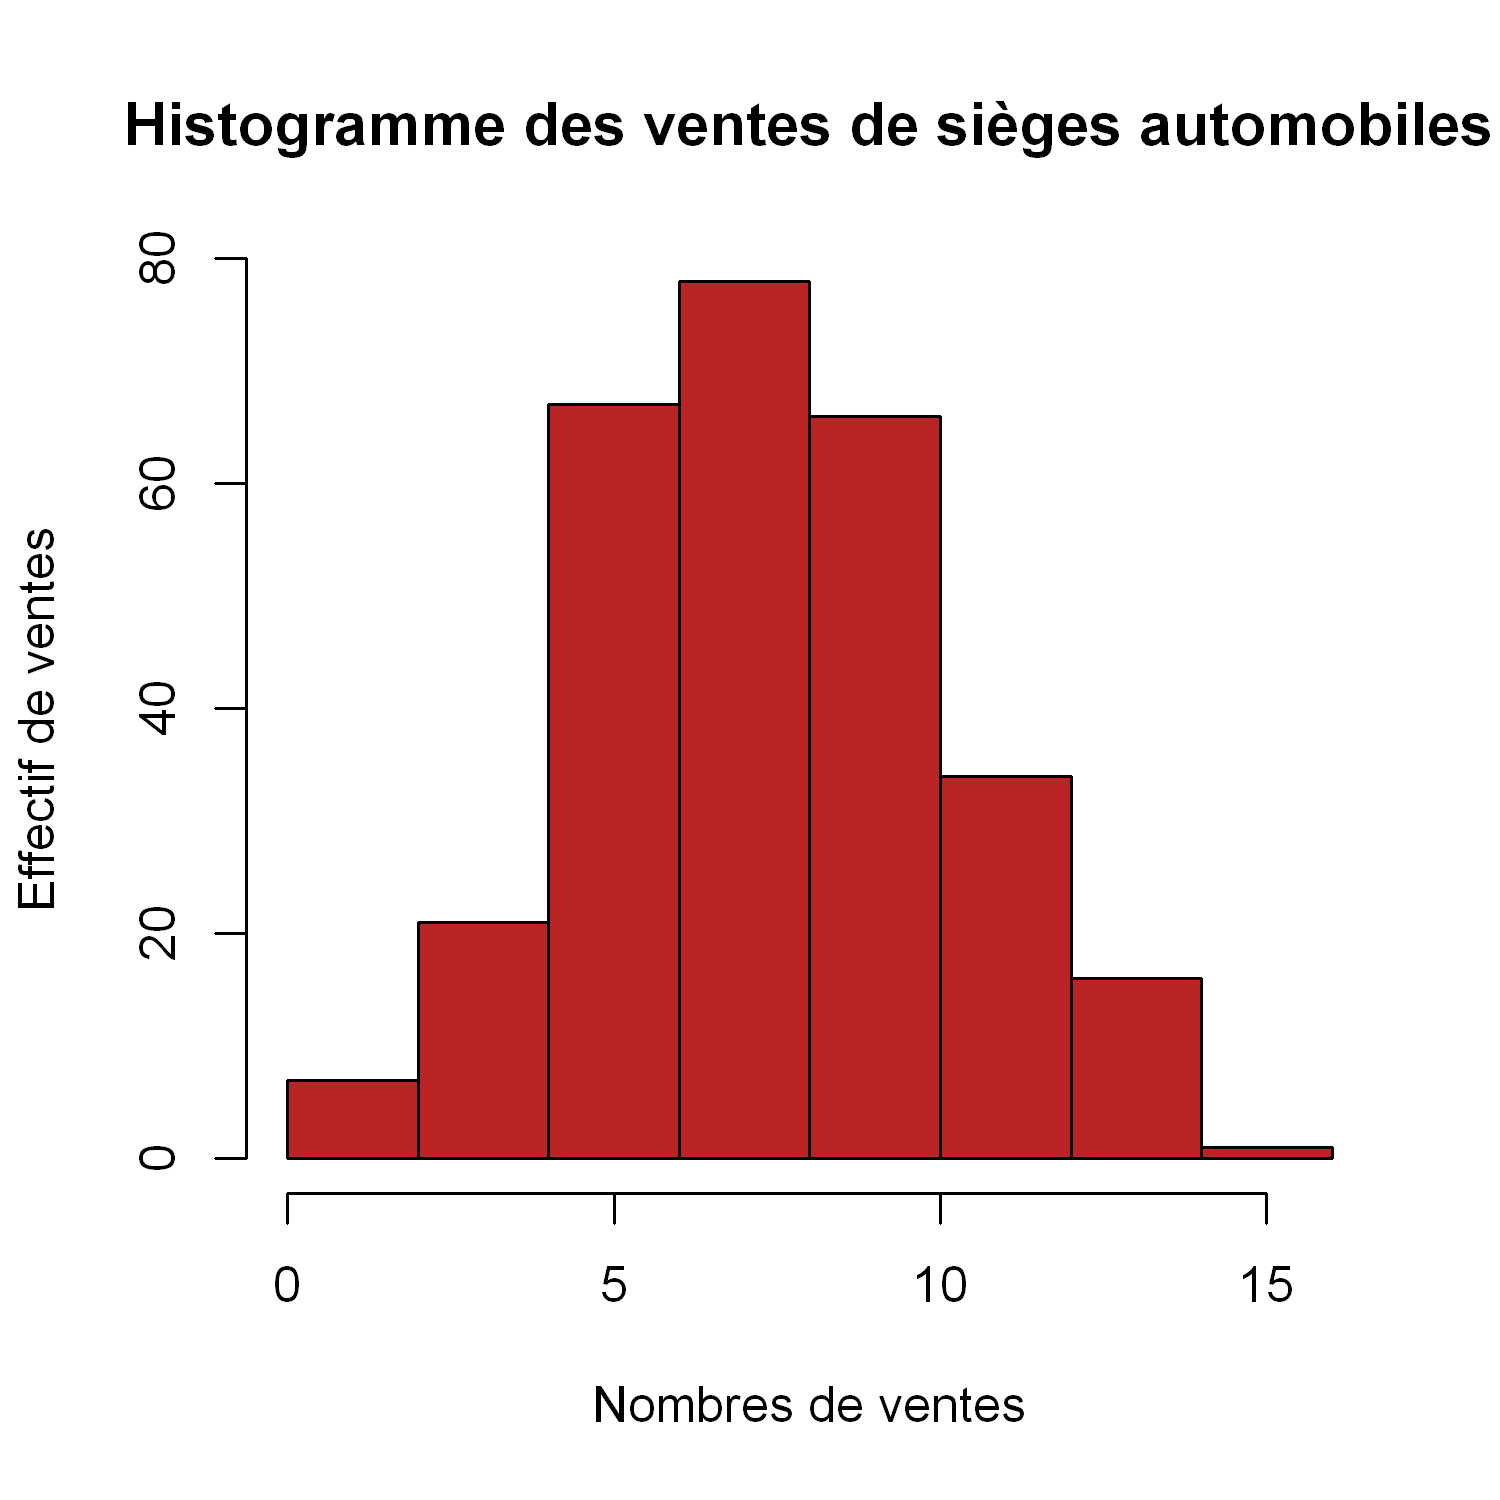

In [121]:
hist(Ventes, col="#bb2424",main="Histogramme des ventes de sièges automobiles",
     border="#000000", xlab="Nombres de ventes",ylab="Effectif de ventes")

Ce graphique montre que la majorité des points de vente ont vendu entre 5 et 10 sièges automobiles.  
<br><br>

#### Box plot du nombre de ventes de siège automobiles

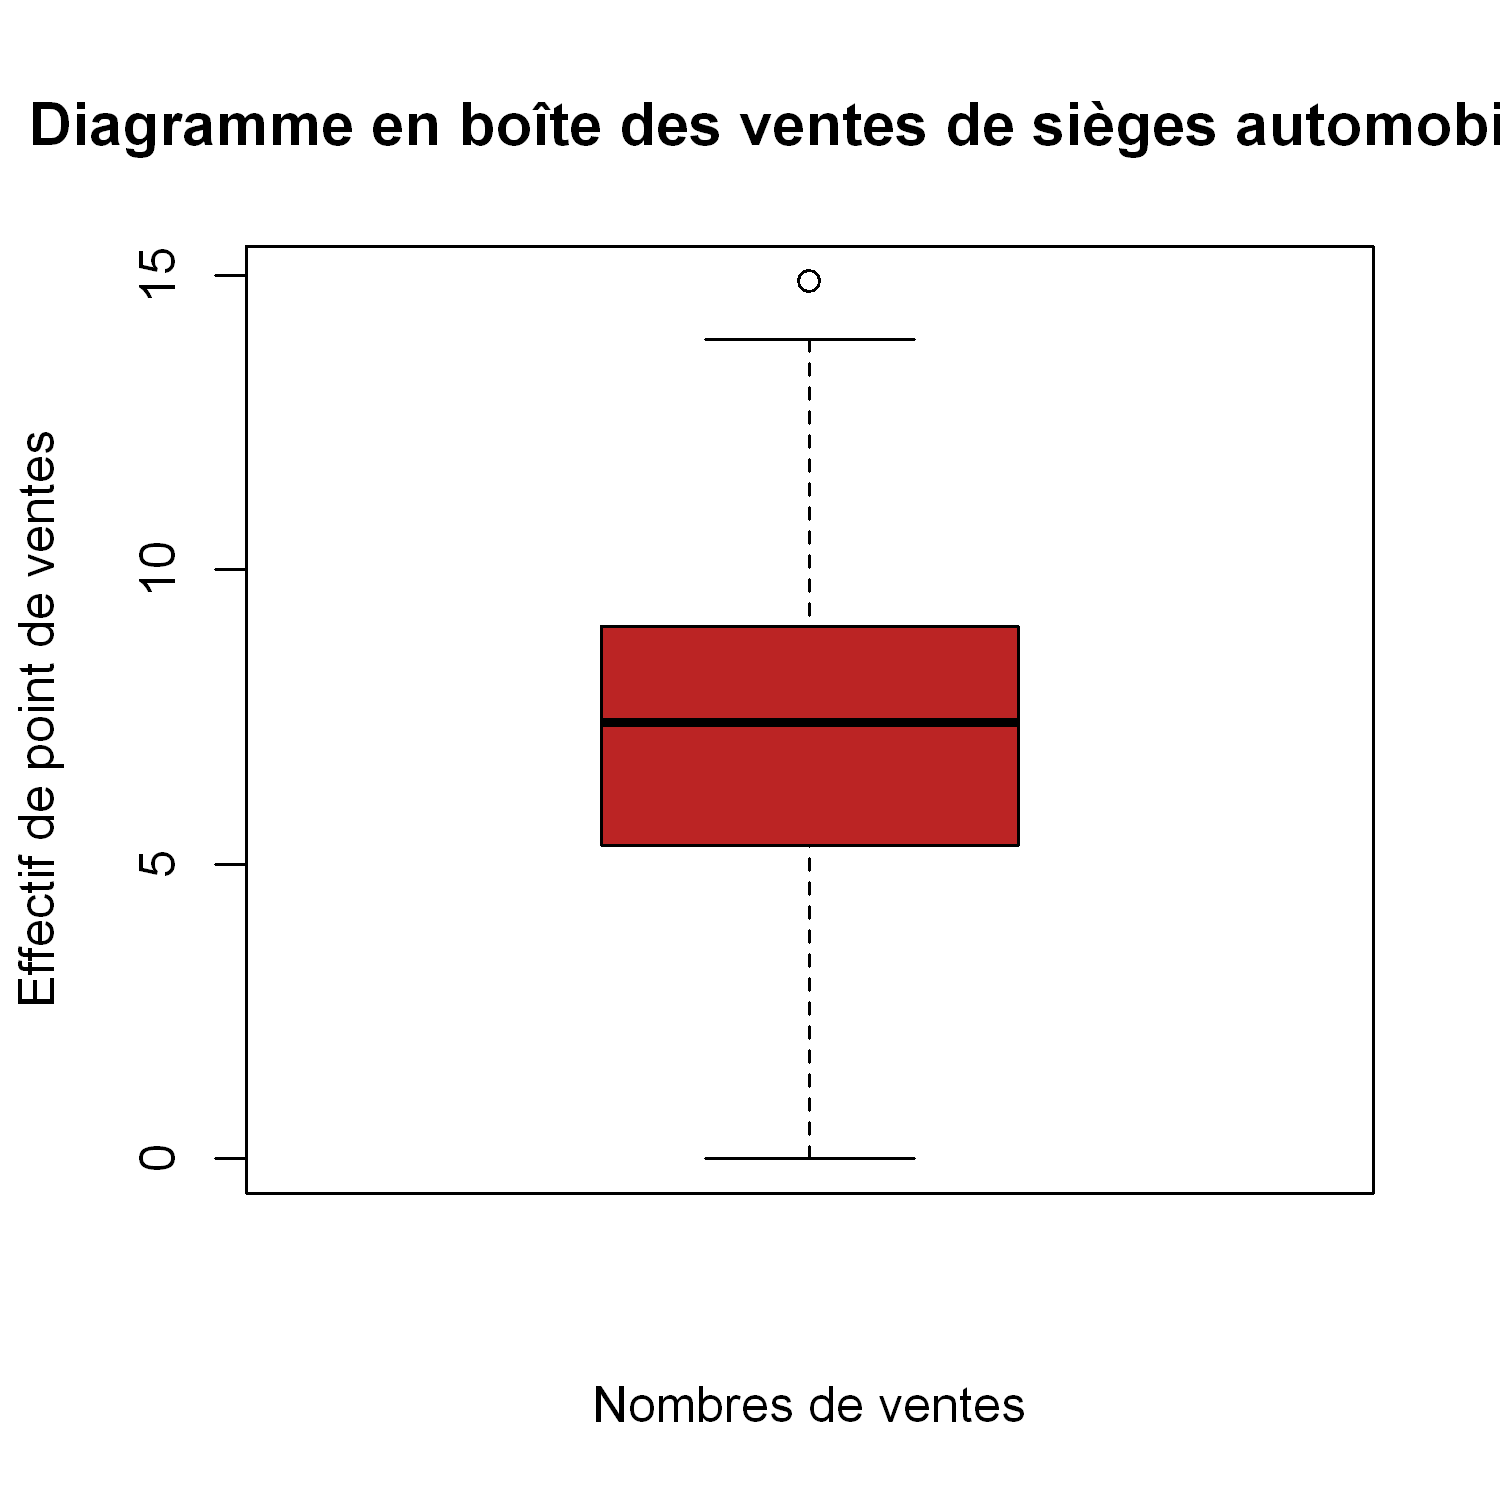

In [122]:
boxplot(Ventes, col="#bb2424",main="Diagramme en boîte des ventes de sièges automobiles",
        border="#000000", xlab="Nombres de ventes",ylab="Effectif de point de ventes")

Ce graphique montre que la moiter des points de vente ont vendu entre 5 et 10 sièges automobiles et que la médiane est d'environ 7,5.  
<br><br>

#### Droite de Henry du nombre de ventes de siège automobiles

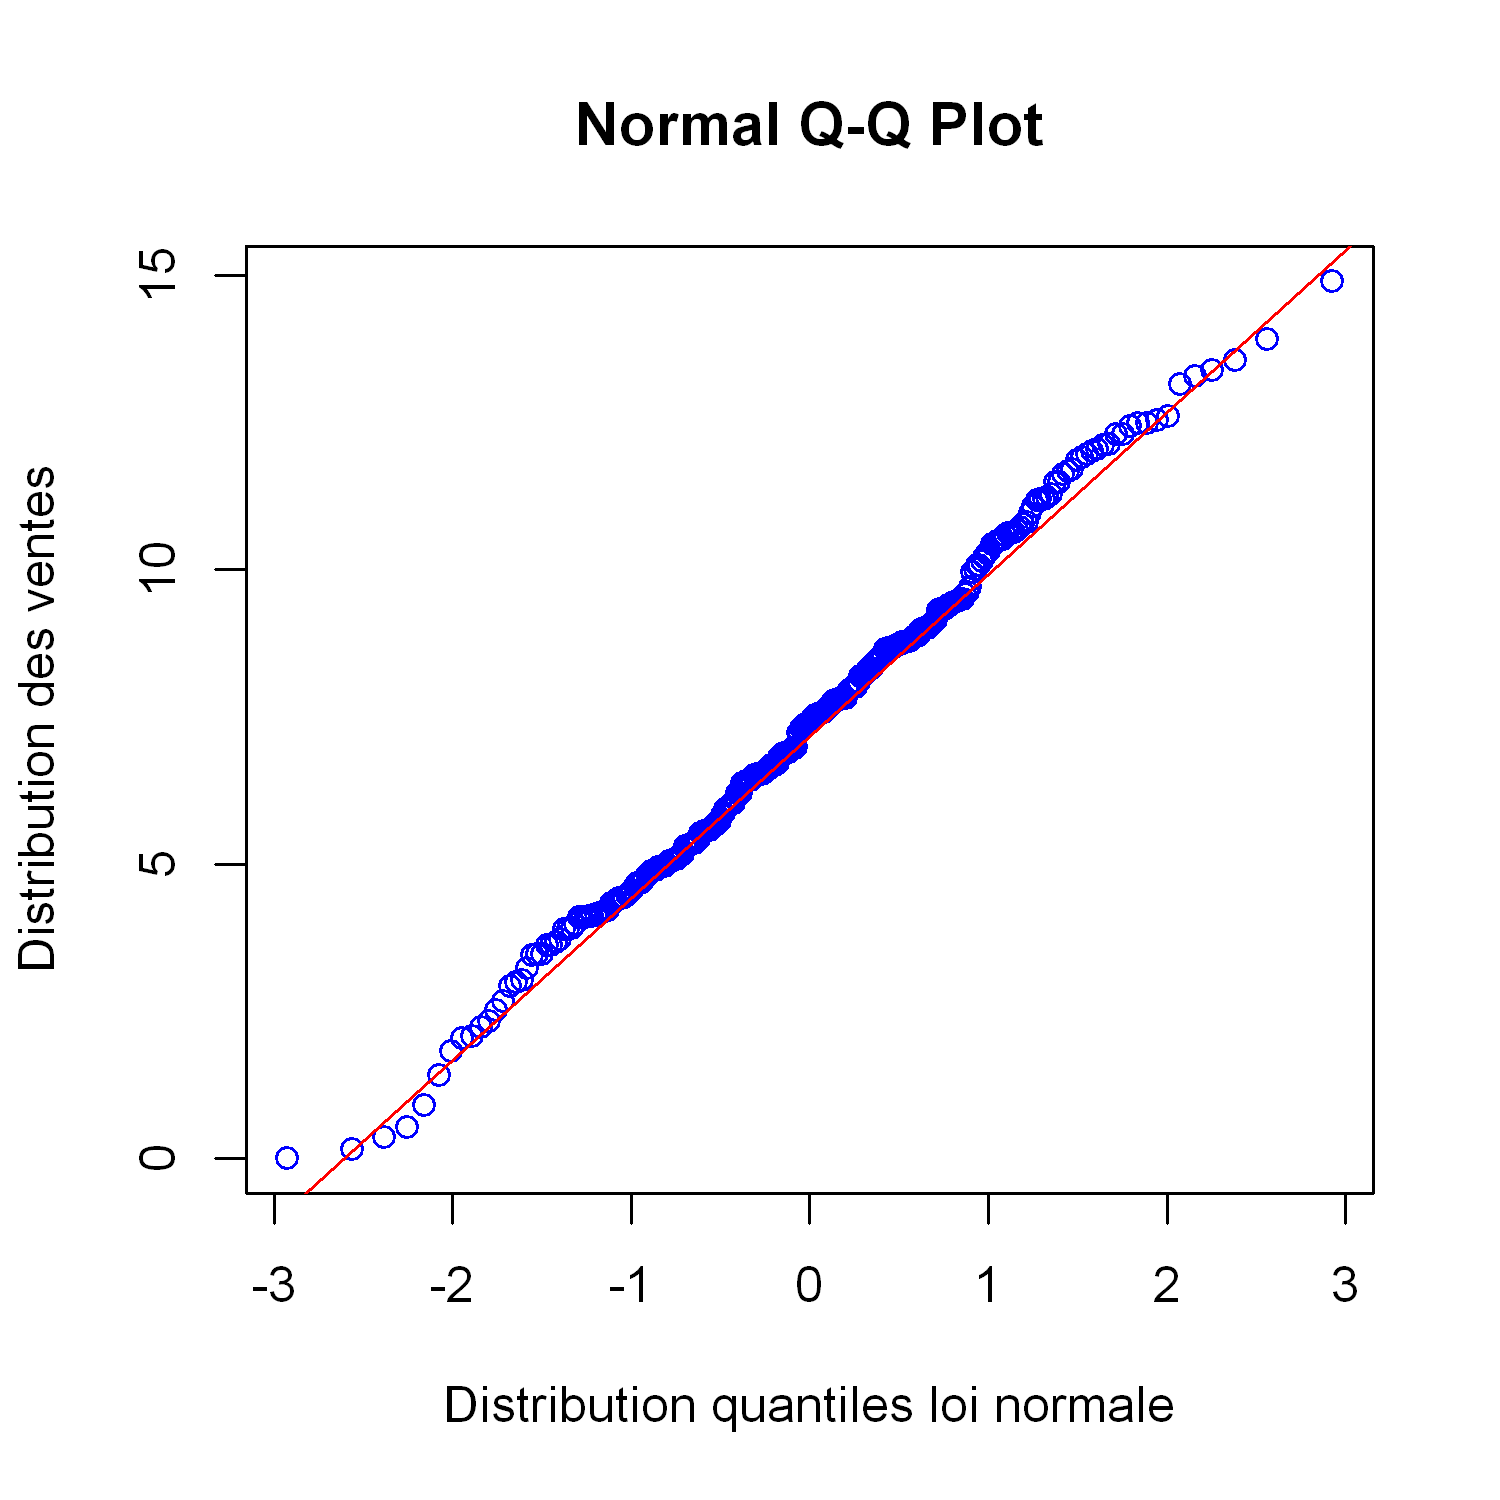

In [123]:
qqnorm(Ventes,col="blue", xlab="Distribution quantiles loi normale",ylab="Distribution des ventes")
qqline(Ventes,col="red")

Les données de ventes semblent suivre une droite de Henry. On peut alors dire que la loi normale est une bonne approximation de la distribution des ventes de sièges automobiles.  
<br><br>

#### Test de normalité du nombre de ventes de siège automobiles

$H_0$: Les données suivent une loi normale  
$H_1$: Les données ne suivent pas une loi normale  

In [124]:
shapiro.test(Ventes)


	Shapiro-Wilk normality test

data:  Ventes
W = 0.99568, p-value = 0.6051


Comme W = 0.99568 n'est pas petit et que p-value = 0.6051 n'est pas petit, on ne rejette pas $H_0$.  
Ainsi le test de normalité montre que les données suivent une loi normale.
<br>
<br>

#### Tableau de statistiques descriptives du nombre de ventes de siège automobiles

Utilisation d'une librarie de R pour le calcule de l'intervalle de confiance à 95% pour la moyenne.

In [125]:
library(KefiR)
cat('La marge d\'erreur est ', int.pop(Ventes, 0.95))

La marge d'erreur est  0.3195956

Caclule de l'intervalle de confiance à 95% pour la moyenne détailé.

In [126]:
cat('La moyenne des ventes est :', mean(Ventes))
cat('\nLa variance des ventes est :', var(Ventes))
cat('\nTaille de la population : n =', length(Ventes))

La moyenne des ventes est : 7.343345
La variance des ventes est : 7.71087
Taille de la population : n = 290

Calcul intervale de confiance à 95% (1 - $\alpha$ = 0.95) pour la moyenne de la population.  
$\bar{X}$ = 7.343 et $\sigma^2$ = 7.71, de plus Ventes ~ N($\mu$, $\sigma^2$).  
On a donc: $\frac{\bar{X} - \mu}{\sigma/\sqrt{n}}$ ~ N(0, 1) soit $\mu \in \bar{X} \pm z_{\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}}$  
<br> 
Calcul $z_{\frac{\alpha}{2}}\frac{\sigma}{\sqrt{n}}$

In [127]:
z <- qnorm(0.025, 0, 1, lower.tail = FALSE) * sqrt(var(Ventes)/length(Ventes))
cat('\nLa marge d\'erreur est :', z)



La marge d'erreur est : 0.3195956

On à donc: $\mu \in \bar{X} \pm 0.3195956$ soit $\mu \in [7.023404, 7.662596]$ à 95%.    
<br>
<br>

Tableau de statistiques :

In [128]:
stat <- matrix(c(
    summary(Ventes)[['1st Qu.']],
    summary(Ventes)[['Median']],
    summary(Ventes)[['Mean']],
    sqrt(var(Ventes)),
    summary(Ventes)[['3rd Qu.']],
    paste("[", 7.023404, ", ",  7.662596, "]", sep = "")),
    ncol=6,
    nrow=1,
    byrow=TRUE)

colnames(stat) <- c('1er Quartile','Médiane','Moyenne','Écart type', '3e Quartile', 'Intervale de confiance')
stat

1er Quartile,Médiane,Moyenne,Écart type,3e Quartile,Intervale de confiance
5.3225,7.415,7.34334482758621,2.77684534828552,9.025,"[7.023404, 7.662596]"


### b)

#### On extrait les données de ventes de sièges automobiles pour chaque région

In [129]:
ventesRegion1 <- alldata[alldata$Region == 0,]$Sales
ventesRegion2 <- alldata[alldata$Region == 1,]$Sales
ventesRegion1[1:5]
ventesRegion2[1:5]

[1] 5.40 4.21 4.34 5.61 8.89

[1] 7.99 6.42 3.47 4.97 6.68

#### On crée un nouveau dataframe avec les données de ventes de sièges automobiles avec une colonne pour différencier les régions.

In [130]:
combineSales <- rbind(
    data.frame(
        Region = "Region 1",
        Ventes = ventesRegion1
    ),
    data.frame(
        Region = "Region 2",
        Ventes = ventesRegion2
    )
)
combineSales[1:5,]

,Region,Ventes
,<chr>,<dbl>
1,Region 1,5.40
2,Region 1,4.21
3,Region 1,4.34
4,Region 1,5.61
5,Region 1,8.89


#### Histogramme du nombre de ventes de siège automobiles par point de vente en fonction de la région

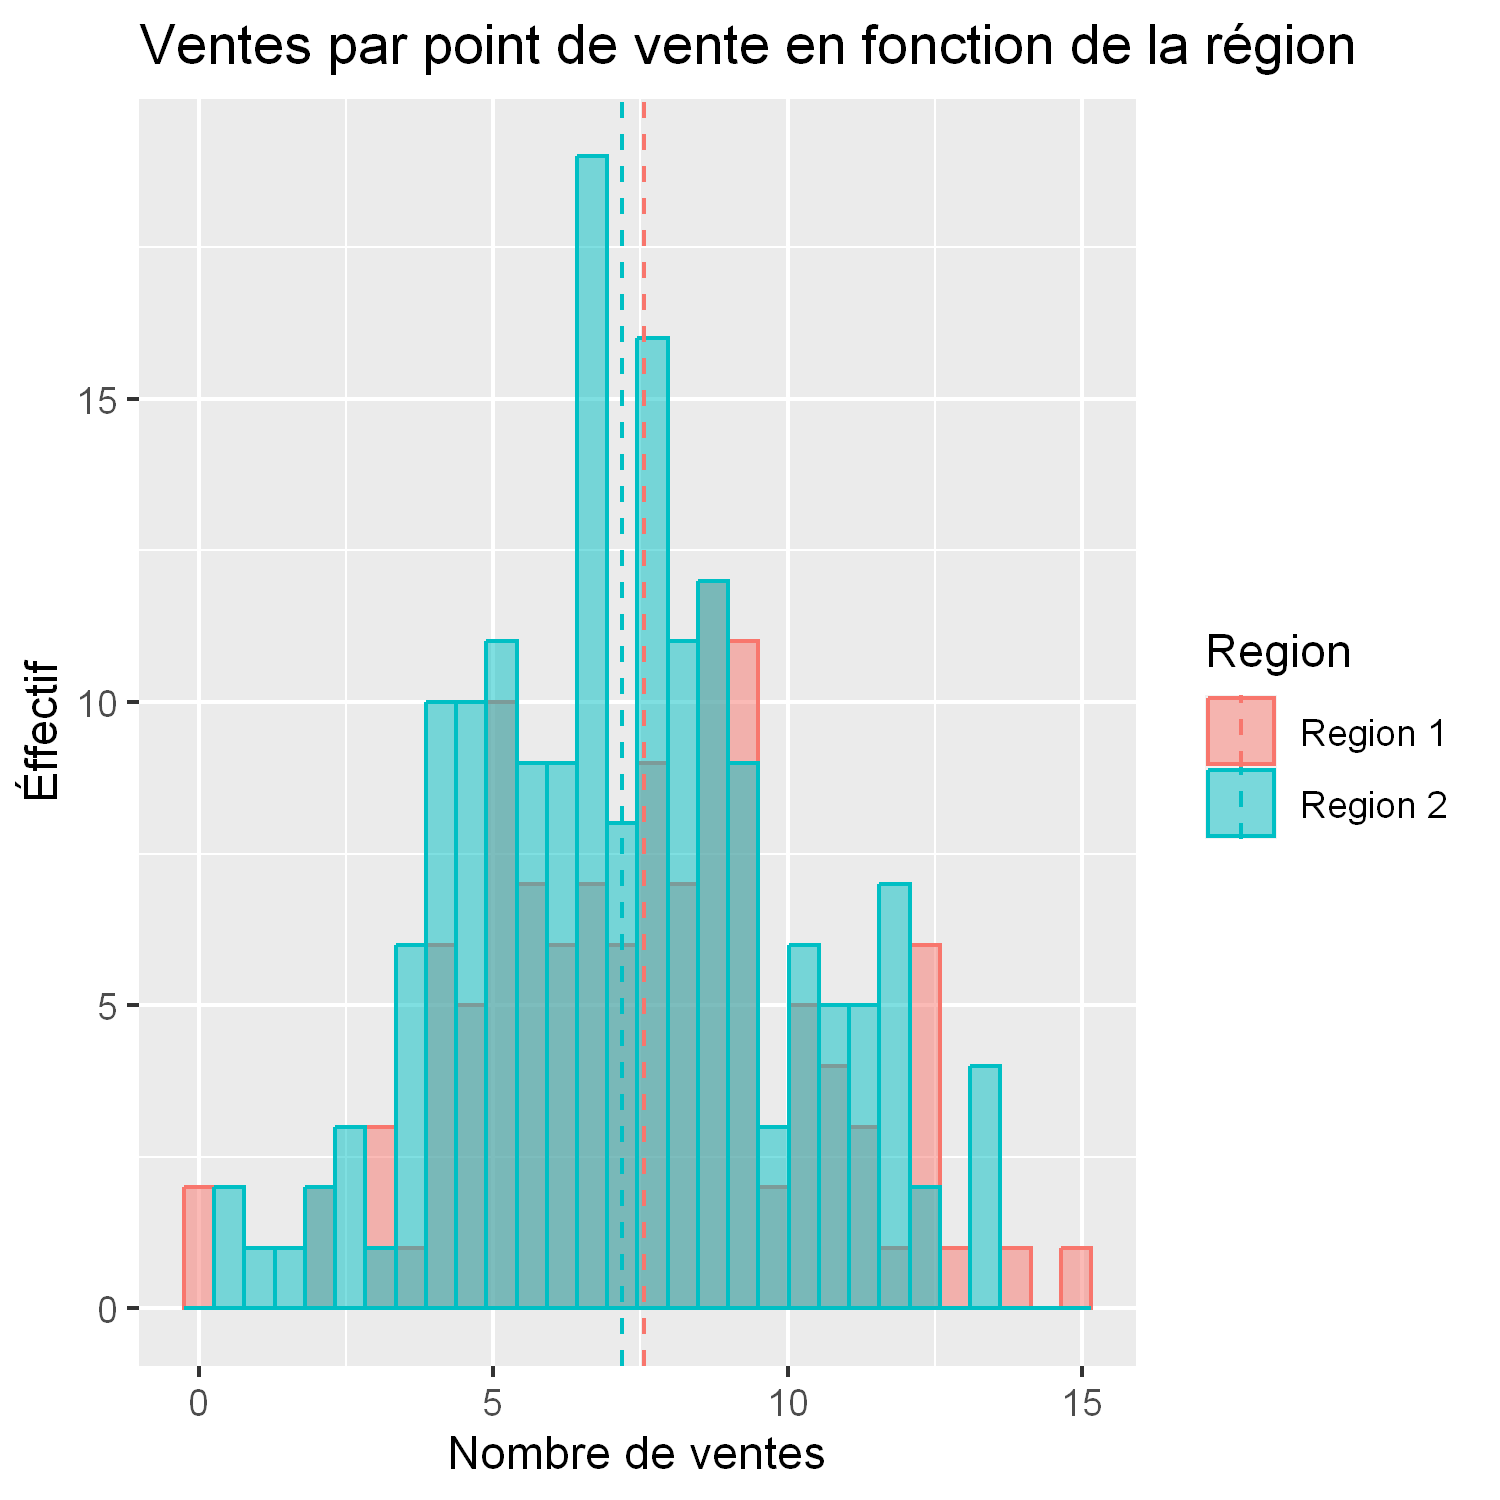

In [133]:
library(ggplot2)

# options(repr.plot.width=7, repr.plot.height=7, repr.plot.xlab.size=2, repr.plot.ylab.size=2)

hist <- ggplot(combineSales, aes(x=Ventes, fill=Region, color=Region)) +
  geom_histogram(bins = 30, alpha=0.5, position="identity") +
  labs(title="Ventes par point de vente en fonction de la région",x="Nombre de ventes", y = "Éffectif")

moy <- data.frame(
    grp.mean = c(mean(ventesRegion1), mean(ventesRegion2)),
    Region = c("Region 1", "Region 2")
)
hist+geom_vline(data=moy, aes(xintercept=grp.mean, color=Region),
             linetype="dashed")

#### Box plot du nombre de ventes de siège automobiles en fonction de la région

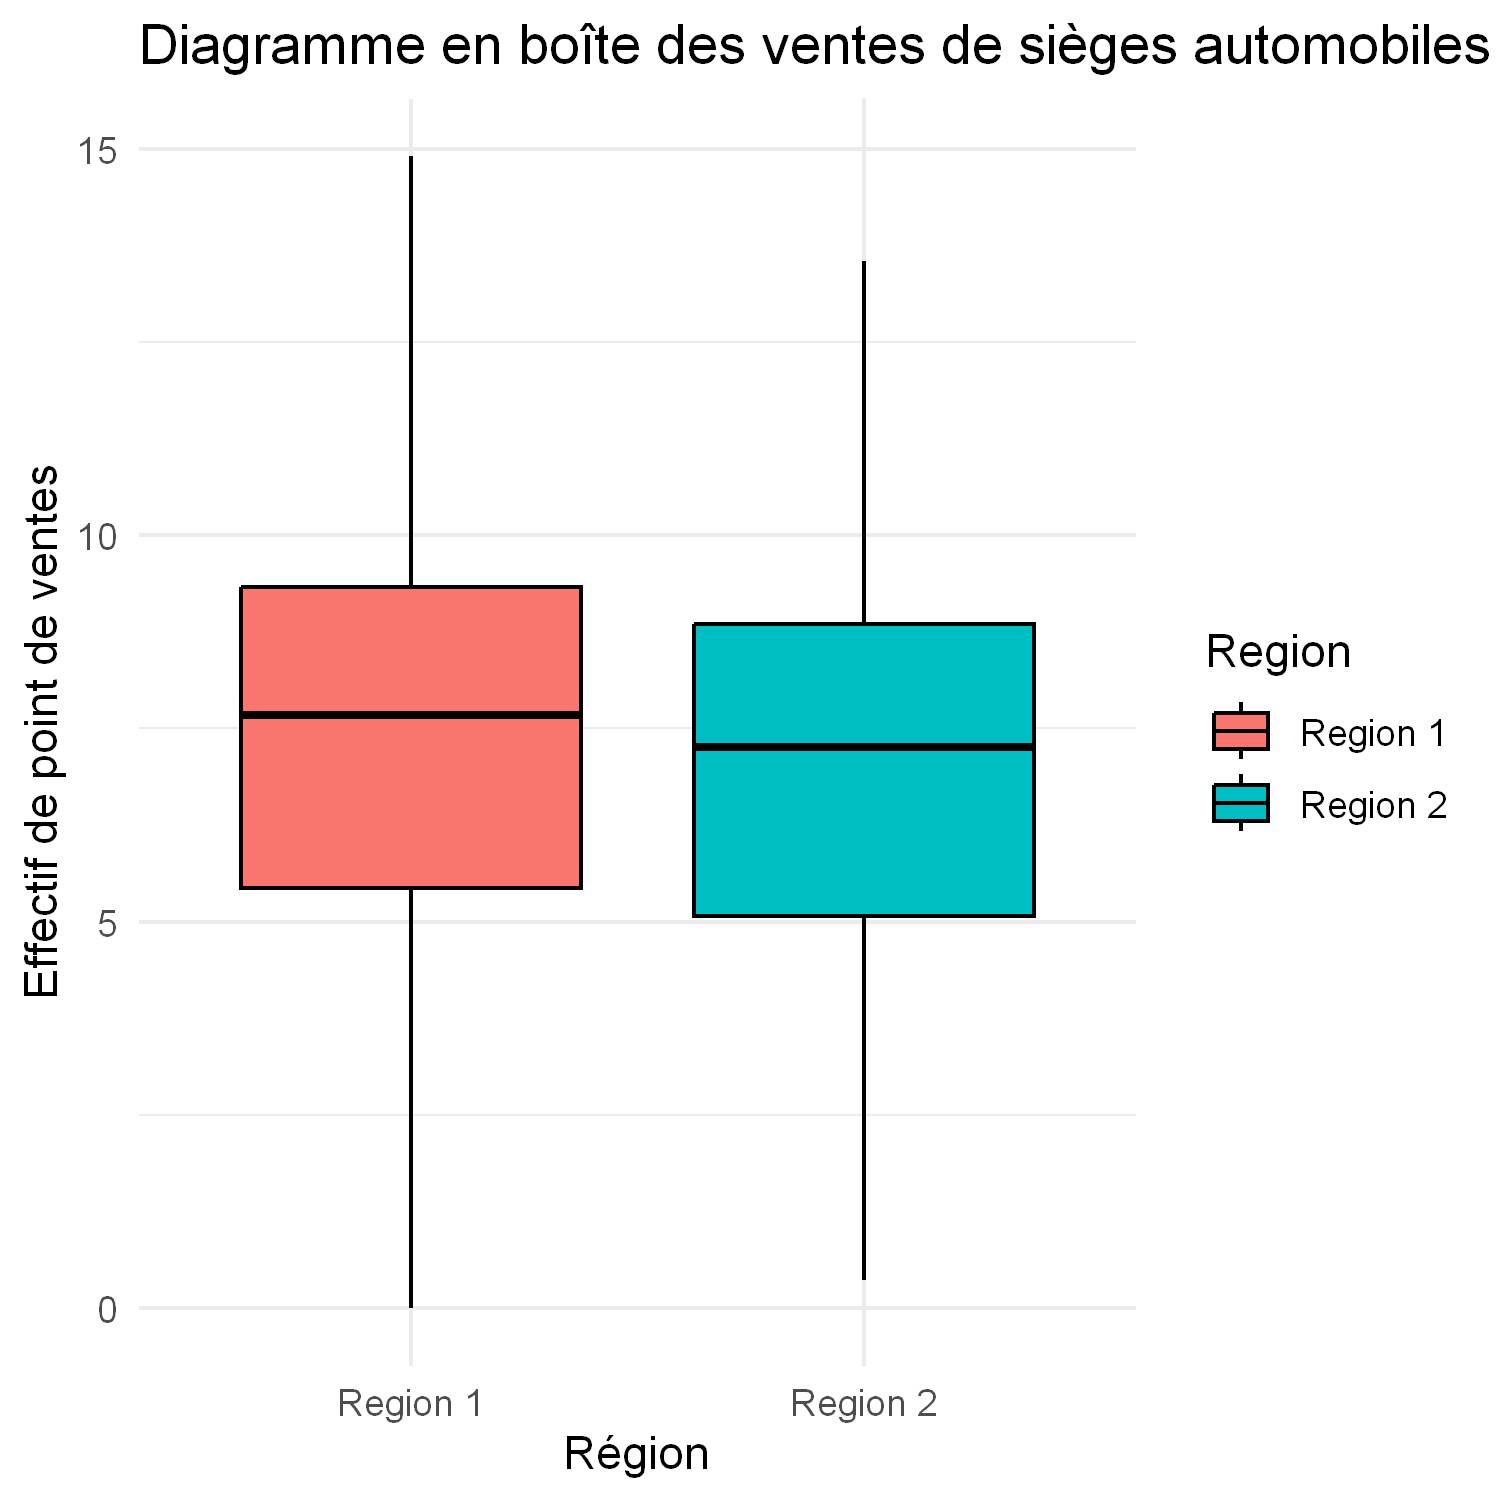

In [132]:
ggplot(combineSales, aes(x=Region, y=Ventes)) +
    geom_boxplot(aes(fill=Region), color="black") +
    theme_minimal() +
    labs(title="Diagramme en boîte des ventes de sièges automobiles par région",
         x="Région", y="Effectif de point de ventes")

#### Tableau de statistiques descriptives du nombre de ventes pas point de vente en fonction de la région

In [147]:
# statRegion1 <- matrix(c(
#     summary(ventesRegion1)[['1st Qu.']],
#     summary(ventesRegion1)[['Median']],
#     summary(ventesRegion1)[['Mean']],
#     sqrt(var(ventesRegion1)),
#     summary(ventesRegion1)[['3rd Qu.']],
#     paste("[", 7.023404, ", ",  7.662596, "]", sep = "")),
#     ncol=6,
#     nrow=1,
#     byrow=TRUE
#     )

# colnames(statRegion1) <- c('1er Quartile','Médiane','Moyenne','Écart type', '3e Quartile', 'Intervale de confiance')
# rownames(statRegion1) <- c('Région 1')

statRegion <- matrix(c(
    0,
    summary(ventesRegion1)[['1st Qu.']],
    summary(ventesRegion1)[['Median']],
    summary(ventesRegion1)[['Mean']],
    sqrt(var(ventesRegion1)),
    summary(ventesRegion1)[['3rd Qu.']],
    paste("[", round(summary(ventesRegion1)[['Mean']] - int.pop(ventesRegion1, 0.95), 3), ", ",  round(summary(ventesRegion1)[['Mean']] + int.pop(ventesRegion1, 0.95), 3), "]", sep = ""),
    
    1,
    summary(ventesRegion2)[['1st Qu.']],
    summary(ventesRegion2)[['Median']],
    summary(ventesRegion2)[['Mean']],
    sqrt(var(ventesRegion2)),
    summary(ventesRegion2)[['3rd Qu.']],
    paste("[", round(summary(ventesRegion2)[['Mean']] - int.pop(ventesRegion2, 0.95), 3), ", ",  round(summary(ventesRegion2)[['Mean']] + int.pop(ventesRegion2, 0.95), 3), "]", sep = "")),
    ncol=7,
    nrow=2,
    byrow=TRUE)

colnames(statRegion) <- c('Région','1er Quartile','Médiane','Moyenne','Écart type', '3e Quartile', 'Intervale de confiance')

statRegion

Région,1er Quartile,Médiane,Moyenne,Écart type,3e Quartile,Intervale de confiance
0,5.44,7.67,7.5635593220339,2.80584631577228,9.335,"[7.057, 8.07]"
1,5.0775,7.265,7.19226744186046,2.75477131611318,8.8525,"[6.781, 7.604]"


# TODO : INTERPRÉTATION